In [1]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680536 sha256=cc1b61b7db43e2771233c4aa2da02a1a85cd365d438be0dff556f6d9f6200647
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-fkj7lfzl/kobert-tokenizer_dd11325008ee430cb6fd7057a0122a86
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-fkj7lfzl/kobert-tokenizer_dd11325008ee430cb6fd7057a0122a86
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4645 sha256=4080d57073b6b76658d529748df3c79190072d02369a87e8f9fdc3208d858b69
  Stored in directory: /tmp/pip-ephem-wheel-cache-0el_cayw/wheels/64/c4/82/d70d864682468fad0bf8269b0dfd88daf48f209be4c8ade164
Successfully built kobert_tokenizer


In [3]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-187w7nu9
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-187w7nu9
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from kobert_tokenizer import KoBERTTokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_pytorch_kobert_model()

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [5]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/train.csv'
data = pd.read_csv(data_path)

In [10]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

data = data.replace(label_dict)
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [11]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [12]:
# Setting parameters
max_len = 200
batch_size = 32
warmup_ratio = 0.1
num_epochs = 30
max_grad_norm = 1
log_interval = 10
learning_rate =  5e-5

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, 
    random_state=2023, stratify=data['label'])

In [14]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, 
    random_state=2023, stratify=y_train)

In [15]:
dataset_train = []
for sen, label in zip(x_train, y_train):
    dataset_train.append((sen, str(label)))
dataset_val = []
for sen, label in zip(x_val, y_val):
    dataset_val.append((sen, str(label)))
dataset_test = []
for sen, label in zip(x_test, y_test):
    dataset_test.append((sen, str(label)))

In [16]:
tk = tokenizer.tokenize
data_train = BERTDataset(dataset_train, 0, 1, tk, vocab, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tk, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tk, vocab, max_len, True, False)

In [17]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [36]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [39]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)
 
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [40]:
# Early Stopping
best_loss = 10 ** 9 # 매우 큰 값으로 초기값 가정
best_acc = 0
patience_limit = 7 # 몇 번의 epoch까지 지켜볼지를 결정
patience_check = 0 # 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록

train_history=[]
val_history=[]
train_loss_history=[]
val_loss_history=[]
for e in range(num_epochs):
    train_acc, train_loss = 0.0, 0.0
    val_acc, val_loss = 0.0, 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        train_loss += loss.data.cpu().numpy()
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            # train_history.append(train_acc / (batch_id+1))
            # train_loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    print("epoch {} train loss {}".format(e+1, train_loss / (batch_id+1)))
    train_history.append(train_acc / (batch_id+1))
    train_loss_history.append(train_loss / (batch_id+1))
    
    model.eval()
    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            val_acc += calc_accuracy(out, label)
            val_loss += loss_fn(out, label).data.cpu().numpy()
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    print("epoch {} val loss {}".format(e+1, val_loss / (batch_id+1)))
    val_history.append(val_acc / (batch_id+1))
    val_loss_history.append(val_loss / (batch_id+1))

    ### early stopping 여부를 체크하는 부분 ###
    if val_acc < best_acc: # acc 개선되지 않은 경우
        patience_check += 1

        if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
            break

    else: # acc가 개선된 경우
        best_acc = val_acc
        patience_check = 0
    # ### early stopping 여부를 체크하는 부분 ###
    # if val_loss > best_loss: # loss가 개선되지 않은 경우
    #     patience_check += 1

    #     if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
    #         break

    # else: # loss가 개선된 경우
    #     best_loss = val_loss
    #     patience_check = 0

  0%|          | 0/84 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.6319061517715454 train acc 0.21875
epoch 1 batch id 11 loss 1.6095784902572632 train acc 0.19318181818181818
epoch 1 batch id 21 loss 1.6164076328277588 train acc 0.17559523809523808
epoch 1 batch id 31 loss 1.3425813913345337 train acc 0.2469758064516129
epoch 1 batch id 41 loss 1.2809487581253052 train acc 0.30335365853658536
epoch 1 batch id 51 loss 1.0093501806259155 train acc 0.3872549019607843
epoch 1 batch id 61 loss 0.896274983882904 train acc 0.4723360655737705
epoch 1 batch id 71 loss 0.5087147951126099 train acc 0.5409330985915493
epoch 1 batch id 81 loss 0.3751174807548523 train acc 0.5952932098765432
epoch 1 train acc 0.609375
epoch 1 train loss 1.0980463489180519


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 1 val acc 0.853125
epoch 1 val loss 0.6219236582517624


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.34079739451408386 train acc 0.96875
epoch 2 batch id 11 loss 0.23864682018756866 train acc 0.9630681818181818
epoch 2 batch id 21 loss 0.2581373155117035 train acc 0.9761904761904762
epoch 2 batch id 31 loss 0.12632670998573303 train acc 0.9838709677419355
epoch 2 batch id 41 loss 0.09405160695314407 train acc 0.9824695121951219
epoch 2 batch id 51 loss 0.08171670883893967 train acc 0.9846813725490197
epoch 2 batch id 61 loss 0.08668908476829529 train acc 0.9871926229508197
epoch 2 batch id 71 loss 0.033797625452280045 train acc 0.9881161971830986
epoch 2 batch id 81 loss 0.0343342125415802 train acc 0.9895833333333334
epoch 2 train acc 0.9899553571428571
epoch 2 train loss 0.1362018131296195


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 2 val acc 0.840625
epoch 2 val loss 0.887321949005127


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.031196126714348793 train acc 1.0
epoch 3 batch id 11 loss 0.025068512186408043 train acc 0.9886363636363636
epoch 3 batch id 21 loss 0.2029649168252945 train acc 0.9895833333333334
epoch 3 batch id 31 loss 0.019216906279325485 train acc 0.9929435483870968
epoch 3 batch id 41 loss 0.019548336043953896 train acc 0.9939024390243902
epoch 3 batch id 51 loss 0.0213283970952034 train acc 0.9944852941176471
epoch 3 batch id 61 loss 0.014891508035361767 train acc 0.9953893442622951
epoch 3 batch id 71 loss 0.009201562032103539 train acc 0.9955985915492958
epoch 3 batch id 81 loss 0.010033344849944115 train acc 0.9953703703703703
epoch 3 train acc 0.9951636904761905
epoch 3 train loss 0.03699480590321833


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 3 val acc 0.8138888888888889
epoch 3 val loss 1.1004369854927063


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.010383729822933674 train acc 1.0
epoch 4 batch id 11 loss 0.013256818987429142 train acc 0.9886363636363636
epoch 4 batch id 21 loss 0.14437107741832733 train acc 0.9836309523809523
epoch 4 batch id 31 loss 0.010632354766130447 train acc 0.9828629032258065
epoch 4 batch id 41 loss 0.013322430662810802 train acc 0.9832317073170732
epoch 4 batch id 51 loss 0.012837528251111507 train acc 0.9834558823529411
epoch 4 batch id 61 loss 0.22969037294387817 train acc 0.9815573770491803
epoch 4 batch id 71 loss 0.5932187438011169 train acc 0.9815140845070423
epoch 4 batch id 81 loss 0.009445467963814735 train acc 0.9830246913580247
epoch 4 train acc 0.9832589285714286
epoch 4 train loss 0.08473442283104218


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 4 val acc 0.859375
epoch 4 val loss 0.8082558823749423


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.18419073522090912 train acc 0.96875
epoch 5 batch id 11 loss 0.025437194854021072 train acc 0.9801136363636364
epoch 5 batch id 21 loss 0.31190094351768494 train acc 0.9791666666666666
epoch 5 batch id 31 loss 0.00826349388808012 train acc 0.9808467741935484
epoch 5 batch id 41 loss 0.479375958442688 train acc 0.9778963414634146
epoch 5 batch id 51 loss 0.42021989822387695 train acc 0.9754901960784313
epoch 5 batch id 61 loss 0.032911498099565506 train acc 0.9769467213114754
epoch 5 batch id 71 loss 0.19092707335948944 train acc 0.9744718309859155
epoch 5 batch id 81 loss 0.019618777558207512 train acc 0.9737654320987654
epoch 5 train acc 0.9747023809523809
epoch 5 train loss 0.12858573347330093


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 5 val acc 0.8375
epoch 5 val loss 0.923988901777193


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.009348360821604729 train acc 1.0
epoch 6 batch id 11 loss 0.02409442886710167 train acc 0.9715909090909091
epoch 6 batch id 21 loss 0.30087658762931824 train acc 0.9702380952380952
epoch 6 batch id 31 loss 0.008806687779724598 train acc 0.9747983870967742
epoch 6 batch id 41 loss 0.009527313522994518 train acc 0.9748475609756098
epoch 6 batch id 51 loss 0.007218639831990004 train acc 0.9791666666666666
epoch 6 batch id 61 loss 0.3877714276313782 train acc 0.9795081967213115
epoch 6 batch id 71 loss 0.5890467166900635 train acc 0.9779929577464789
epoch 6 batch id 81 loss 0.005536660552024841 train acc 0.9737654320987654
epoch 6 train acc 0.9747023809523809
epoch 6 train loss 0.12551969548665165


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 6 val acc 0.834375
epoch 6 val loss 1.001185005530715


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.018235033378005028 train acc 1.0
epoch 7 batch id 11 loss 0.024188395589590073 train acc 0.9829545454545454
epoch 7 batch id 21 loss 0.29176849126815796 train acc 0.9806547619047619
epoch 7 batch id 31 loss 0.03512945771217346 train acc 0.9838709677419355
epoch 7 batch id 41 loss 0.00564984604716301 train acc 0.9878048780487805
epoch 7 batch id 51 loss 0.005539910867810249 train acc 0.9895833333333334
epoch 7 batch id 61 loss 0.006175520364195108 train acc 0.9902663934426229
epoch 7 batch id 71 loss 0.005378562957048416 train acc 0.9894366197183099
epoch 7 batch id 81 loss 0.009424767456948757 train acc 0.9876543209876543
epoch 7 train acc 0.9877232142857143
epoch 7 train loss 0.06229397217144391


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 7 val acc 0.834375
epoch 7 val loss 1.0045186473522336


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.014862562529742718 train acc 1.0
epoch 8 batch id 11 loss 0.005655422806739807 train acc 0.96875
epoch 8 batch id 21 loss 0.18650344014167786 train acc 0.9627976190476191
epoch 8 batch id 31 loss 0.007872014306485653 train acc 0.9667338709677419
epoch 8 batch id 41 loss 0.09019756317138672 train acc 0.9725609756097561
epoch 8 batch id 51 loss 0.005719508044421673 train acc 0.9761029411764706
epoch 8 batch id 61 loss 0.1542569100856781 train acc 0.9769467213114754
epoch 8 batch id 71 loss 0.00809748936444521 train acc 0.9766725352112676
epoch 8 batch id 81 loss 0.006113504059612751 train acc 0.9787808641975309
epoch 8 train acc 0.9791666666666666
epoch 8 train loss 0.10290476913186944


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 8 val acc 0.846875
epoch 8 val loss 0.8844516894780099


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.0060902005061507225 train acc 1.0
epoch 9 batch id 11 loss 0.11847536265850067 train acc 0.9857954545454546
epoch 9 batch id 21 loss 0.28363466262817383 train acc 0.9851190476190477
epoch 9 batch id 31 loss 0.06039942800998688 train acc 0.9868951612903226
epoch 9 batch id 41 loss 0.003242043312638998 train acc 0.9900914634146342
epoch 9 batch id 51 loss 0.02248511277139187 train acc 0.9901960784313726
epoch 9 batch id 61 loss 0.00463590444996953 train acc 0.9902663934426229
epoch 9 batch id 71 loss 0.005955743603408337 train acc 0.9903169014084507
epoch 9 batch id 81 loss 0.004749666899442673 train acc 0.9911265432098766
epoch 9 train acc 0.9914434523809523
epoch 9 train loss 0.04471829553811057


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 9 val acc 0.840625
epoch 9 val loss 1.0192955474252812


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.11425020545721054 train acc 0.96875
epoch 10 batch id 11 loss 0.0048584179021418095 train acc 0.9829545454545454
epoch 10 batch id 21 loss 0.004439120646566153 train acc 0.9895833333333334
epoch 10 batch id 31 loss 0.038119055330753326 train acc 0.9879032258064516
epoch 10 batch id 41 loss 0.00324853858910501 train acc 0.9908536585365854
epoch 10 batch id 51 loss 0.003709989134222269 train acc 0.9920343137254902
epoch 10 batch id 61 loss 0.002762964926660061 train acc 0.9923155737704918
epoch 10 batch id 71 loss 0.0028692346531897783 train acc 0.9920774647887324
epoch 10 batch id 81 loss 0.0037030880339443684 train acc 0.9922839506172839
epoch 10 train acc 0.9925595238095238
epoch 10 train loss 0.041542640052891024


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 10 val acc 0.834375
epoch 10 val loss 1.1002019500243478


  0%|          | 0/84 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.0029653417877852917 train acc 1.0
epoch 11 batch id 11 loss 0.2852179706096649 train acc 0.9857954545454546
epoch 11 batch id 21 loss 0.018697543069720268 train acc 0.9925595238095238
epoch 11 batch id 31 loss 0.002845020964741707 train acc 0.9899193548387096
epoch 11 batch id 41 loss 0.005908908322453499 train acc 0.9900914634146342
epoch 11 batch id 51 loss 0.0036362085957080126 train acc 0.9901960784313726
epoch 11 batch id 61 loss 0.24884669482707977 train acc 0.9887295081967213
epoch 11 batch id 71 loss 0.003021928248926997 train acc 0.9898767605633803
epoch 11 batch id 81 loss 0.0030057530384510756 train acc 0.9911265432098766
epoch 11 train acc 0.9914434523809523
epoch 11 train loss 0.0450854454926836


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 11 val acc 0.828125
epoch 11 val loss 1.1180911728646605


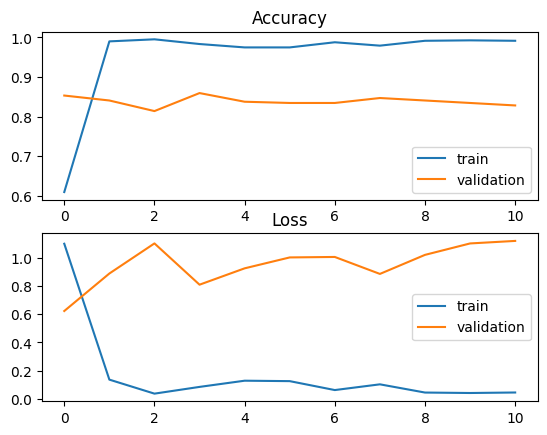

In [41]:
plt.subplot(2, 1, 1)
plt.title('Accuracy')
plt.plot(train_history, label='train')
plt.plot(val_history, label='validation')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(train_loss_history, label='train')
plt.plot(val_loss_history, label='validation')
plt.legend()
plt.show()

In [42]:
model.eval()
test_acc = 0.0
y_pred = []
y_test = []
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
        y_test = np.hstack((y_test, label.cpu().numpy()))
        y_pred = np.hstack((y_pred, torch.max(out, 1)[1].cpu().numpy()))
print("test acc {}".format(test_acc / (batch_id+1)))

  0%|          | 0/24 [00:00<?, ?it/s]

test acc 0.8333333333333334


In [43]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[280   4  24   8   1]
 [ 23 111   4   7   2]
 [ 33   4 101   8   0]
 [  4   2   3 103   0]
 [  0   1   0   0  19]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       317
         1.0       0.91      0.76      0.83       147
         2.0       0.77      0.69      0.73       146
         3.0       0.82      0.92      0.87       112
         4.0       0.86      0.95      0.90        20

    accuracy                           0.83       742
   macro avg       0.84      0.84      0.83       742
weighted avg       0.83      0.83      0.83       742

0.834912969443557


In [44]:
reverse_label = {}
for k, v in label_dict.items():
    reverse_label[v] = k

In [45]:
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tk, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        logits=out[0]
        logits = logits.detach().cpu().numpy()
        pred = np.argmax(logits)
        print(f'>> 분류 결과 : {reverse_label[pred]}')

In [46]:
predict("tokenization은 어떤 역할을 하나요?")

>> 분류 결과 : 이론


In [47]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 코드2


In [48]:
predict('for i in range(10)')

>> 분류 결과 : 코드2


In [49]:
predict('<a href="www.google.com"> Google </a>')

>> 분류 결과 : 코드2


In [50]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 코드2


In [51]:
predict("엔 그램 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 이론


In [52]:
predict("N-Gram 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 코드2


In [53]:
predict('N-Gram의 개념이 뭔가요?')

>> 분류 결과 : 이론


In [54]:
predict("출석 요청드립니다.")

>> 분류 결과 : 시스템 운영


In [ ]:
# save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/save_model/'
# torch.save(model, save_path + 'v4_kobert_200_0.8445_drop_x.pt')